### Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


Libraries Loading

In [ ]:
import collections
import sys
import os
import io
import pandas as pd
from pandas import plotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from time import strftime
from datetime import datetime

%matplotlib inline

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Plotly Code Loading

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Check for null data

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Data visualization

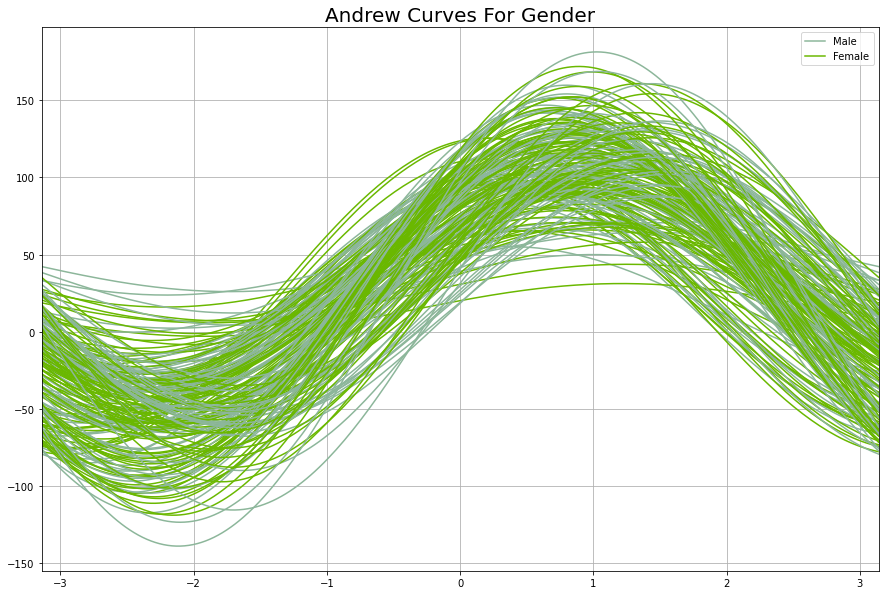

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(df.drop('CustomerID', axis=1), 'Gender')
plt.title('Andrew Curves For Gender', fontsize=20)
plt.show()

As the Andrews curves are able to preserve means, distance, and variances, the corresponding data points will also be close together.

In [ ]:
def DistPlotTwoFeature(df, firstFeature, secondFeature):
  configure_plotly_browser_state()
  group_labels = [firstFeature, secondFeature]
  
  fig = make_subplots(
      rows = 1, 
      cols = 2,
      subplot_titles = (
          'Distribution of {}'.format(firstFeature),
          'Distribution of {}'.format(secondFeature),          
      )
  )

  fig.add_trace(
      go.Histogram(x=df[firstFeature], histnorm='probability'),
      row = 1,
      col = 1,
  )

  fig.add_trace(
      go.Histogram(x=df[secondFeature], histnorm='probability'),
      row = 1,
      col = 2,
  )

  fig.update_layout(template='plotly_white')
  iplot(fig, filename='Two Feature')

In [ ]:
DistPlotTwoFeature(df, 'Annual Income (k$)', 'Age')

In [ ]:
def PieChart(labels, values, colors):
  configure_plotly_browser_state()

  trace = go.Pie(
      labels = labels,
      values = values,
      marker = dict(colors=colors)
  )

  layout = go.Layout(
      template = 'plotly_white',
      title = 'Gender of Customers'
  )

  data = [trace]

  fig = go.Figure(data=data, layout=layout)
  fig.show()

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']

PieChart(labels, size, colors)

In [ ]:
def Histogram(df, feature, color):
  configure_plotly_browser_state()
  trace = go.Histogram(
      x = df[feature],
      histnorm = 'percent',
      marker_color = color,
      xbins = dict(size = 0.5),
  )

  layout = go.Layout(
      template = 'plotly_white',
      title = 'Distribution of {}'.format(feature),
  )
  data = [trace]

  fig = go.Figure(data=data, layout=layout)
  fig.show()

In [ ]:
Histogram(df, 'Age', color='#330C73')

In [ ]:
Histogram(df, 'Annual Income (k$)', color='#EB89B5')

In [ ]:
def ViolinPlot(df, firstFeature, secondFeature):
  configure_plotly_browser_state()

  trace = go.Violin(
      x = df[firstFeature], 
      y = df[secondFeature], 
      box_visible = True, 
      meanline_visible = True
  )

  data = [trace]
  fig = go.Figure(data=data)
  fig.update_layout(title_text='{} Vs {}'.format(firstFeature, secondFeature), template = 'plotly_white')
  fig.show()

In [ ]:
ViolinPlot(df, 'Gender', 'Annual Income (k$)')

In [ ]:
def StripPlot(firstFeature, secondFeature):
  configure_plotly_browser_state()
  fig = px.strip(df, x=firstFeature, y=secondFeature)
  fig.update_layout(title_text='{} Vs {}'.format(firstFeature, secondFeature), template = 'plotly_white')
  fig.show()

In [ ]:
StripPlot('Gender', 'Age')

## Clustering Analysis

In [ ]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

### Annual Income and Spending Score

Elbow Method

In [ ]:
def ElbowMethod(x):
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

  dataframe = pd.DataFrame(wcss, columns = ['WCSS'])
  dataframe['Clusters'] = range(1, 11)
  configure_plotly_browser_state()
  fig = px.line(dataframe, x='Clusters', y='WCSS')
  fig.update_layout(title_text='Elbow Method', template = 'plotly_white')
  fig.show()

Hierachical Clustering

In [ ]:
def HierarchicalClustering(df):
  configure_plotly_browser_state()
  fig = ff.create_dendrogram(df, linkagefun = lambda x: sch.linkage(x, 'ward'))
  fig.update_layout(width=1600, height=500, template = 'plotly_white')
  fig.show()

Visualzing Clusters

In [ ]:
def Visualize(df, x, firstFeature, secondFeature, thirdFeature, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
  y_means = kmeans.fit(x)

  trace0 = go.Scatter(
      x = x[firstFeature], 
      y = x[secondFeature], 
      mode = 'markers', 
      marker = go.Marker(
          size = df[thirdFeature] / 2,
          sizemode = 'diameter',
          color = y_means.predict(x),
          colorscale = 'mint',
          opacity = 0.75,
      ),
      showlegend = False,
  )

  trace1 = go.Scatter(
      x = y_means.cluster_centers_[:, 0],
      y = y_means.cluster_centers_[:, 1],
      name = '',
      mode = 'markers',
      marker = go.Marker(
          symbol = 'x',
          size = 12,
          color = 'gray'
      ),
      showlegend = False
  )

  configure_plotly_browser_state()
  data = go.Data([trace0, trace1])
  fig = go.Figure(data=data)
  fig.update_layout(template = 'plotly_white')
  fig.show()

In [ ]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
ElbowMethod(x)

In [ ]:
HierarchicalClustering(x)

In [ ]:
Visualize(df, x, 'Annual Income (k$)', 'Spending Score (1-100)', 'Age', 5)

### Age and Spending Score

In [ ]:
x = df[['Age', 'Spending Score (1-100)']]
ElbowMethod(x)

In [ ]:
HierarchicalClustering(x)

In [ ]:
Visualize(df, x, 'Age', 'Spending Score (1-100)', 'Annual Income (k$)', 4)

### 3D KMeans

In [ ]:
df_x = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
df['labels'] = labels
configure_plotly_browser_state()
trace = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = df['labels'],
        size = 10,
        line = dict(
            color = df['labels'],
            width = 12
        ),
        opacity = 0.8,
    )
)

data = [trace]

layout = go.Layout(
    margin = dict(l=0, r=0, b=0, t=0),
    template = 'plotly_white',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title='Annual Income'),
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)